# Cloning quasars

Download the SDSS quasars data

- Upsample this distribution in two ways, using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

(Hint: `scipy.stats` is your best friend)

- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data 

(Hint: `astropy.cosmology` is another close friend). The best-fit cosmological model from the Plack data is:
    
    

In [1]:
import astropy
#astropy.cosmology.Planck15

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import fetch_dr7_quasar
from scipy.stats import rv_histogram
from scipy.interpolate import interp1d
from astropy.cosmology import Planck15 # The astropy.cosmology sub-package contains classes for representing cosmologies and utility functions for calculating commonly used quantities that depend on a cosmological model. This includes distances, ages, and lookback times corresponding to a measured redshift or the transverse separation corresponding to a measured angular separation.
from scipy.integrate import quad
from scipy import stats, interpolate
from numpy.random import random
import scipy.stats


In [3]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

Let me show the pdf in histogram form

Text(0, 0.5, 'p(z)')

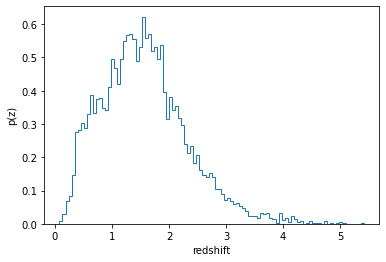

In [4]:
plt.hist(z,bins=100,histtype='step', density=True)
plt.xlabel('redshift')
plt.ylabel('p(z)')

Now I dfine the proposal distribution (q(x)), and the generating pdf  fro the QSO distribution. This last function has to be normalize so I take the integral over the z value range.

In [5]:
qso_pdf = lambda z_data: 4*np.pi*Planck15.differential_comoving_volume(z_data).value

def normalization_pdf(x):
    return quad(qso_pdf,np.min(x),np.max(x))[0]


(array([0.00750005, 0.03000019, 0.06750042, 0.08437555, 0.14812589,
        0.2756268 , 0.28312669, 0.30375182, 0.28875189, 0.33000216,
        0.38812754, 0.3318768 , 0.37500245, 0.37687747, 0.34875228,
        0.34125223, 0.41062723, 0.49687881, 0.46687753, 0.42000228,
        0.49687881, 0.54937798, 0.56812808, 0.57187938, 0.55500301,
        0.48937875, 0.53250289, 0.62250338, 0.55875428, 0.57000309,
        0.51937898, 0.53250289, 0.4968777 , 0.53625411, 0.39562715,
        0.31500241, 0.38062706, 0.34125185, 0.35437692, 0.31875173,
        0.29625293, 0.2400013 , 0.21375116, 0.23437627, 0.183751  ,
        0.20812706, 0.16125087, 0.14625079, 0.14062576, 0.15375083,
        0.14062639, 0.10500057, 0.10500057, 0.09000049, 0.07125039,
        0.07687576, 0.06750037, 0.05812532, 0.06375035, 0.05437529,
        0.04687546, 0.0375002 , 0.02250012, 0.02437513, 0.02437513,
        0.01687509, 0.03187532, 0.02812515, 0.03375018, 0.0187501 ,
        0.01500008, 0.00187502, 0.03187517, 0.01

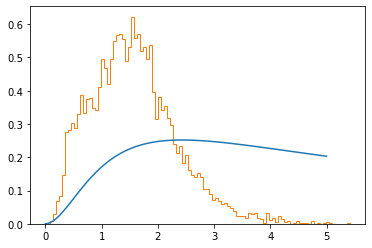

In [6]:
xx=np.linspace(0,5,100)
plt.plot(xx, qso_pdf(xx)/normalization_pdf(xx))
plt.hist(z,bins=100,histtype='step', density=True)

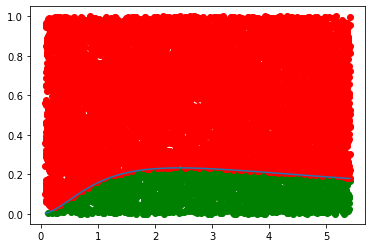

(array([0.01033168, 0.04132672, 0.0516584 , 0.09815097, 0.07232177,
        0.13947769, 0.10331681, 0.12398017, 0.16014105, 0.18080441,
        0.13431185, 0.20663362, 0.20146778, 0.19113609, 0.14980937,
        0.18597025, 0.27378954, 0.23762866, 0.28412122, 0.23246282,
        0.17047273, 0.27895538, 0.17047273, 0.26345786, 0.2427945 ,
        0.30995042, 0.22729698, 0.20146778, 0.24796034, 0.23762866,
        0.26345786, 0.22213114, 0.20663362, 0.22729698, 0.22729698,
        0.21179946, 0.22213114, 0.15497521, 0.14980937, 0.22729698,
        0.21179946, 0.23246282, 0.21179946, 0.21179946, 0.12914601,
        0.25312618, 0.18597025, 0.16530689, 0.13947769, 0.19113609]),
 array([0.13111743, 0.23666778, 0.34221814, 0.44776849, 0.55331884,
        0.65886919, 0.76441954, 0.8699699 , 0.97552025, 1.0810706 ,
        1.18662095, 1.2921713 , 1.39772165, 1.50327201, 1.60882236,
        1.71437271, 1.81992306, 1.92547341, 2.03102377, 2.13657412,
        2.24212447, 2.34767482, 2.45322517, 2.

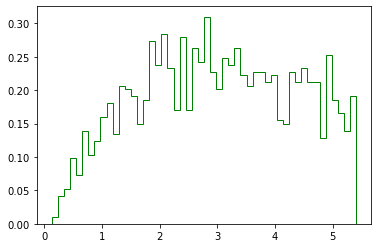

In [7]:
f= lambda x: qso_pdf(x) / normalization_pdf(x)

N=10000

xg = np.linspace(np.min(z),np.max(z),100)

plt.plot(xg,f(xg))


ymax = 1 # maxh
x = np.random.uniform(np.min(z),np.max(z),N) # proposal distribution
y = np.random.uniform(0,ymax,N) # samples


plt.scatter(x[y<f(x)],y[y<f(x)],c='green')
plt.scatter(x[y>f(x)],y[y>f(x)],c='red') # rejected samples

plt.show()
goodpoints = x[y<f(x)]


plt.hist(goodpoints,bins=50,density=True,histtype='step',color='green')



Inverse transform

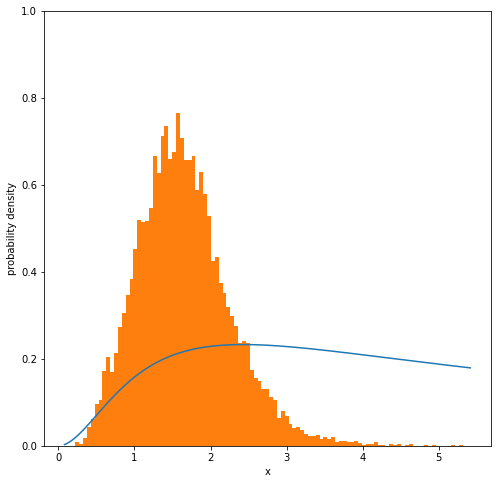

In [8]:
def sample(g):
    x = z
    y = g(x)                        # probability density function, pdf
    cdf_y = np.cumsum(y)            # cumulative distribution function, cdf
    cdf_y = cdf_y/cdf_y.max()       # takes care of normalizing cdf to 1.0
    inverse_cdf = interpolate.interp1d(cdf_y,x)    # this is a function
    return inverse_cdf # i.e. the quantile

def return_samples(N):
    # let's generate some samples according to the chosen pdf, qso_pdf(x)
    uniform_samples = random(int(N))
    required_samples = sample(qso_pdf)(uniform_samples)
    return required_samples 

x = np.linspace(np.min(z),np.max(z),10000)
plt.figure(figsize=(8,8))
plt.xlabel('x')
plt.ylabel('probability density')
plt.plot(x, qso_pdf(x)/normalization_pdf(x) )
cloned=return_samples(10000)
plt.hist(cloned,bins=100,density=True)
plt.ylim(0,1)
plt.show() 







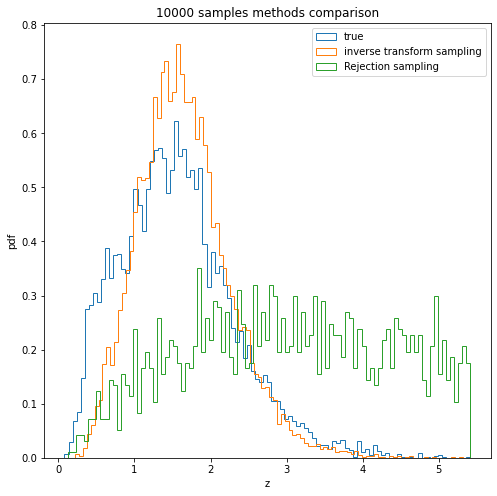

In [9]:
plt.figure(figsize=(8,8))
plt.hist(z,bins=100,density=True, histtype='step',label='true')
plt.hist(cloned,bins=100,density=True, histtype='step',label='inverse transform sampling')
plt.hist(goodpoints,bins=100,density=True, histtype='step',label='Rejection sampling')
plt.title('10000 samples methods comparison')
plt.xlabel('z')
plt.ylabel('pdf')
plt.legend(loc=0)


Note: Invers transform sampling works better than rejection sampling since it follow the true distribution.

Up to now I use the pdf in the analitic form, but I can use also an histogram object

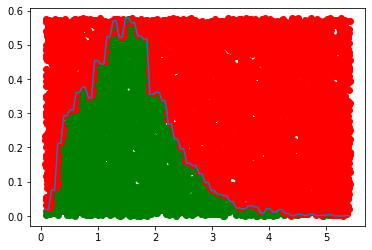

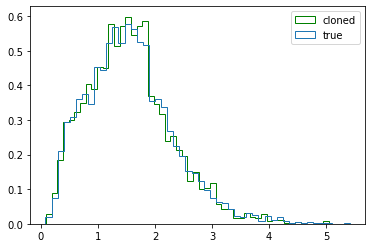

In [10]:
counts, bins = np.histogram(z, bins=50, density=True)
ymax = counts.max() # find the maximum

f=rv_histogram((counts,bins))

N=10000

xg = np.linspace(np.min(z),np.max(z),100)

plt.plot(xg,f.pdf(xg))


x = np.random.uniform(np.min(z),np.max(z),N) # proposal distribution
y = np.random.uniform(0,ymax,N) # samples


plt.scatter(x[y<f.pdf(x)],y[y<f.pdf(x)],c='green')
plt.scatter(x[y>f.pdf(x)],y[y>f.pdf(x)],c='red') # rejected samples

plt.show()
goodpoints = x[y<f.pdf(x)]


plt.hist(goodpoints,bins=50,density=True,histtype='step',color='green', label='cloned')
plt.hist(z,bins=50,density=True, histtype='step', label='true')
plt.legend(loc=0)

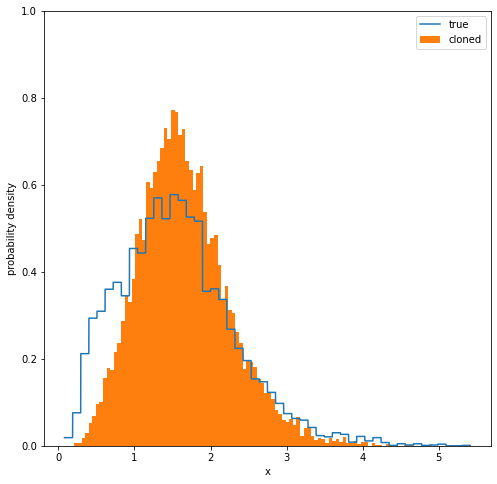

In [11]:
def sample(g):
    x = z
    y = g(x)                        # probability density function, pdf
    cdf_y = np.cumsum(y)            # cumulative distribution function, cdf
    cdf_y = cdf_y/cdf_y.max()       # takes care of normalizing cdf to 1.0
    inverse_cdf = interpolate.interp1d(cdf_y,x)    # this is a function
    return inverse_cdf # i.e. the quantile

def return_samples(N):
    # let's generate some samples according to the chosen pdf, qso_pdf(x)
    uniform_samples = random(int(N))
    required_samples = sample(qso_pdf)(uniform_samples)
    return required_samples 

x = np.linspace(np.min(z),np.max(z),10000)
plt.figure(figsize=(8,8))
plt.xlabel('x')
plt.ylabel('probability density')
plt.plot(x, f.pdf(x),label='true')
cloned=return_samples(10000)
plt.hist(cloned,bins=100,density=True, label='cloned')
plt.ylim(0,1)
plt.legend(loc=0)
plt.show() 

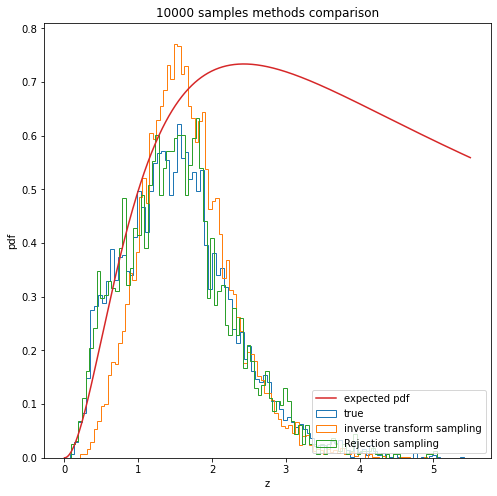

In [12]:
zz=np.linspace(0,5.5,1000)

plt.figure(figsize=(8,8))
plt.hist(z,bins=100,density=True, histtype='step',label='true')
plt.hist(cloned,bins=100,density=True, histtype='step',label='inverse transform sampling')
plt.hist(goodpoints,bins=100,density=True, histtype='step',label='Rejection sampling')
plt.plot(zz,3.2*qso_pdf(zz)/normalization_pdf(zz), label='expected pdf') # 3.2 by hand normalization
plt.title('10000 samples methods comparison')
plt.xlabel('z')
plt.ylabel('pdf')
plt.legend(loc=0)

Note: using the histogrma object and not the expected pdf also the rejection method works. This suggest that both are valid sapling method, but inverse transform is more powerfull. I also check visualli the expected pdf.

I compute correlation coefficent between cloned and true points, just to check that they are the same. I expect small correlation values.

In [13]:
x=cloned
y=z

r=scipy.stats.pearsonr(x, y)    # Pearson's r
r_s=scipy.stats.spearmanr(x, y)   # Spearman's rho
t=scipy.stats.kendalltau(x, y)  # Kendall's tau

print('person coefficent r=', r)
print('Sperman coefficent rs=', r_s)
print('Kendall coefficent tau=',t)

person coefficent r= (-0.01731431929766461, 0.08339020375814114)
Sperman coefficent rs= SpearmanrResult(correlation=-0.01714584003930782, pvalue=0.08643772845995103)
Kendall coefficent tau= KendalltauResult(correlation=-0.011521284284646032, pvalue=0.084014142312885)
